Imports

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('00_input.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

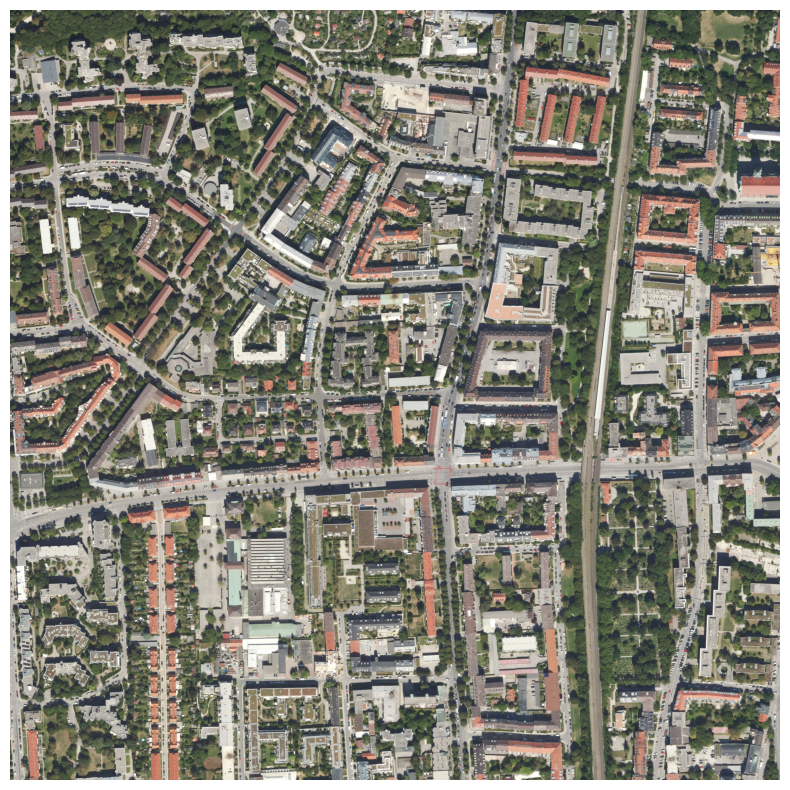

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

Mask Generation

In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


# Depending on your GPU you can choose between vit_l and vit_h
# ..ViT-L having 308M, and ViT-H having 636M parameters
# You can also change the points per batch
# Strong GPU
# SAM_CHECKPOINT = "checkpoints/sam_vit_h_4b8939.pth"
# MODEL_TYPE = "vit_h"
# POINTS_PER_BATCH = 64
# Weak GPU
SAM_CHECKPOINT = "checkpoints/sam_vit_l_0b3195.pth"
MODEL_TYPE = "vit_l"
POINTS_PER_BATCH = 12


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

sam = sam_model_registry[MODEL_TYPE](checkpoint=SAM_CHECKPOINT)
sam.to(device=DEVICE)

# mask_generator = SamAutomaticMaskGenerator(sam)
torch.cuda.empty_cache()
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    # points_per_side=32,
    points_per_batch=POINTS_PER_BATCH,
    # pred_iou_thresh=0.86,
    # stability_score_thresh=0.92,
    # crop_n_layers=1,
    # crop_n_points_downscale_factor=2,
    # min_mask_region_area=100,  # Requires open-cv to run post-processing
)


In [5]:
masks = mask_generator.generate(image)

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

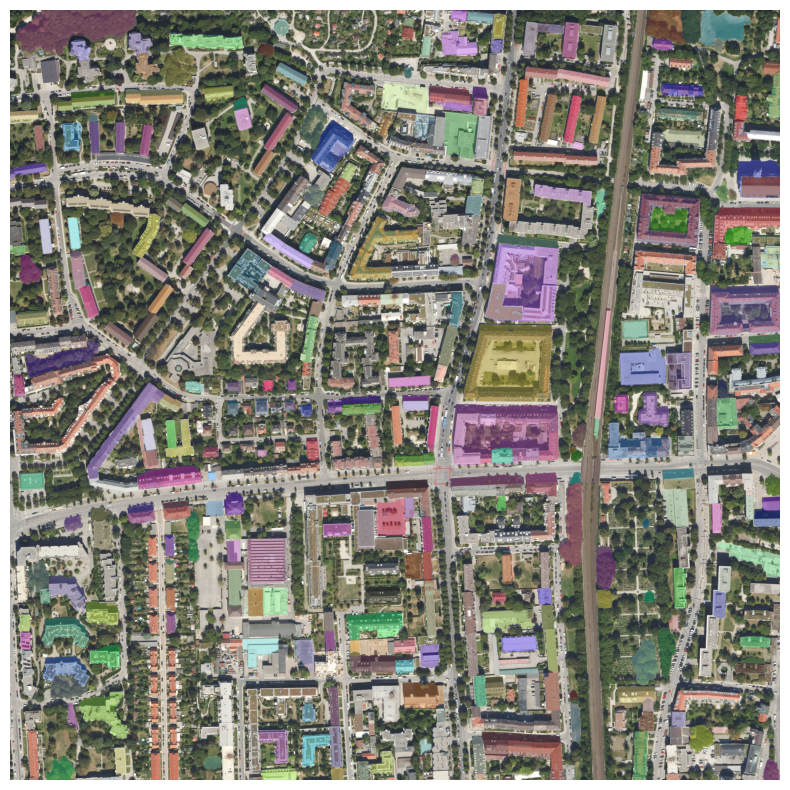

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 